In [1]:
!pip install -U accelerate &> /dev/null
!pip install -U transformers &> /dev/null
!pip install datasets &> /dev/null

In [1]:
import pandas as pd

df = pd.read_csv('News_Category_Dataset_v3.csv')

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [2]:
df.shape

(189815, 6)

In [3]:
df.isna().sum()

link                     0
headline                 1
category                 0
short_description        0
authors              32955
date                     0
dtype: int64

In [4]:
unique_categories = df.category.unique()
category_to_idx = {category: idx for idx, category in enumerate(unique_categories)}
df['category_id'] = df.category.map(lambda category: category_to_idx[category])

df.head()

,link,headline,category,short_description,authors,date,category_id
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,0
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,0
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,1
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,2
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,0


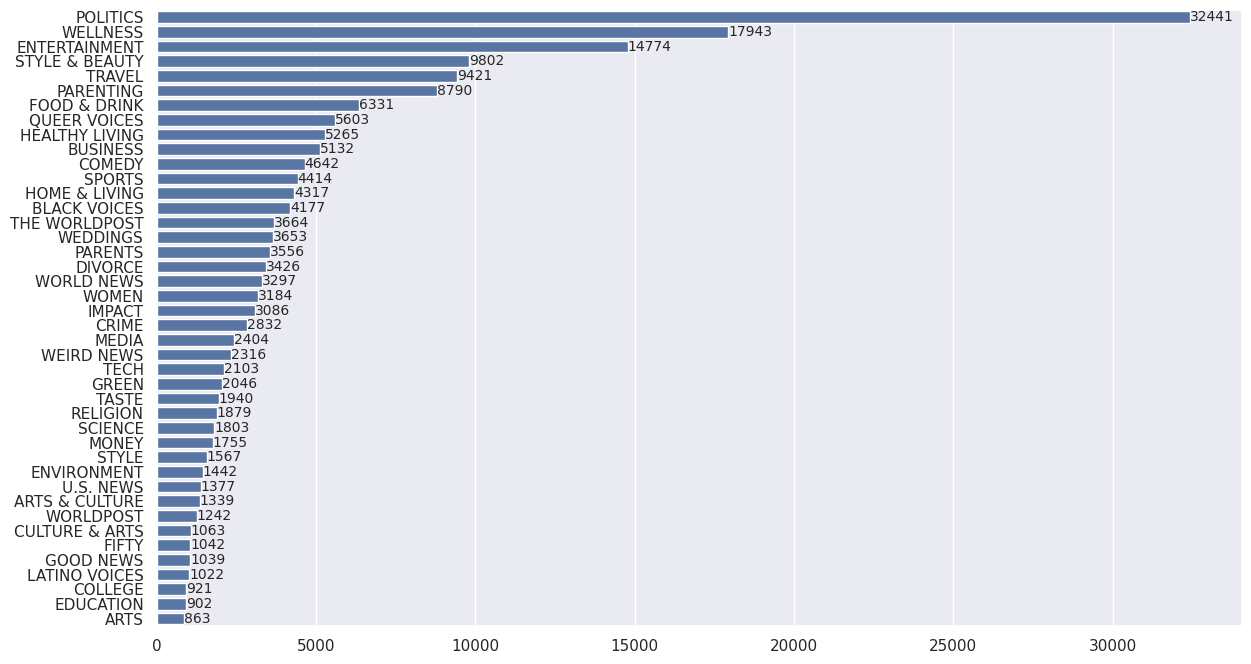

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

counts = df.category.value_counts()
plt.figure(figsize=(14, 8))
ax = sns.barplot(y=counts.index, x=counts.values, orient='h')
ax.bar_label(ax.containers[0], fontsize=10)
plt.ylabel('')
plt.xlabel('')
plt.show()

In [6]:
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
def get_num_tokens(text: str) -> int:
    return len(tokenizer(text)['input_ids'])

df['Tokens Per Description'] = df.short_description.map(get_num_tokens)

df.head()

,link,headline,category,short_description,authors,date,category_id,Tokens Per Description
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,0,36
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,0,37
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,1,19
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,2,39
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,0,30


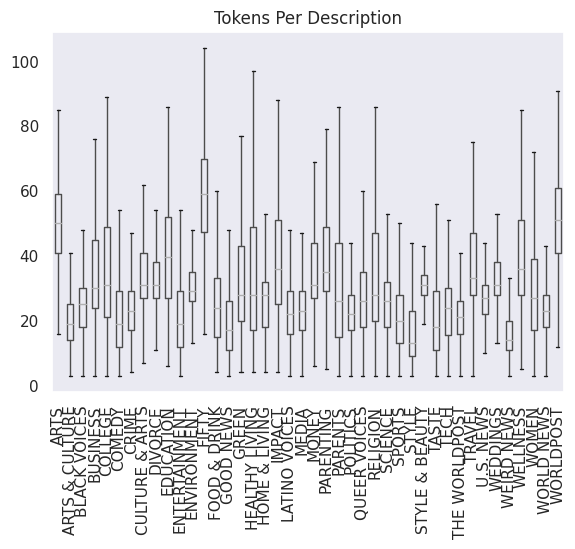

In [8]:
df.boxplot('Tokens Per Description', by='category', grid=False, showfliers=False)
plt.suptitle('')
plt.xlabel('')
plt.xticks(rotation=90)
plt.show()

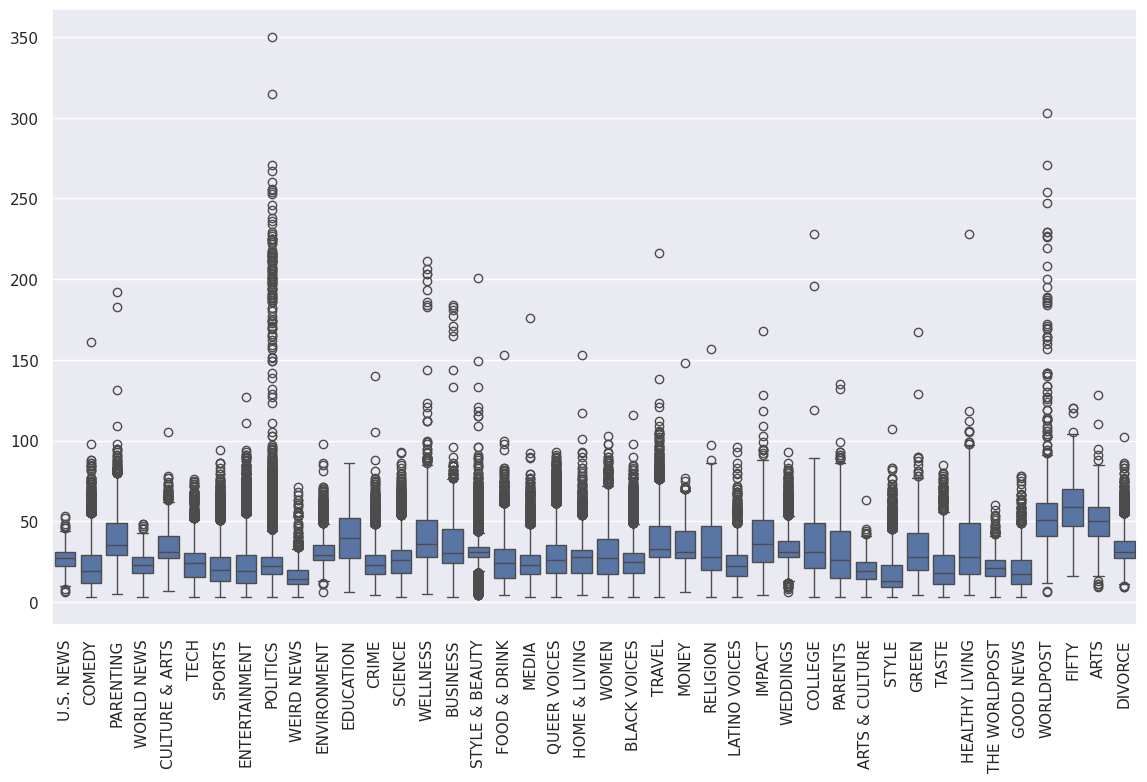

In [9]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='category', y='Tokens Per Description')

plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

In [10]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

X = df.drop(columns=['category_id'])
y = df.category_id
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.97, stratify=y, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

len(X_train), len(X_test), len(X_valid)

(184120, 2847, 2848)

In [11]:
train_dataset = Dataset.from_dict({'description': X_train.short_description.values.tolist(),
                                   'category': y_train.tolist()})
test_dataset = Dataset.from_dict({'description': X_test.short_description.values.tolist(),
                                  'category': y_test.tolist()})
validation_dataset = Dataset.from_dict({'description': X_valid.short_description.values.tolist(),
                                         'category': y_valid.tolist()})

dataset = DatasetDict({'train': train_dataset, 'test': test_dataset, 'validation': validation_dataset})

dataset

DatasetDict({
    train: Dataset({
        features: ['description', 'category'],
        num_rows: 184120
    })
    test: Dataset({
        features: ['description', 'category'],
        num_rows: 2847
    })
    validation: Dataset({
        features: ['description', 'category'],
        num_rows: 2848
    })
})

In [12]:
def tokenize(batch):
    return tokenizer(batch['description'], padding=True, truncation=True, add_special_tokens=True)

dataset_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/184120 [00:00<?, ? examples/s]

Map:   0%|          | 0/2847 [00:00<?, ? examples/s]

Map:   0%|          | 0/2848 [00:00<?, ? examples/s]

In [13]:
import torch
from transformers import AutoModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [15]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k: v.to(device) for k, v in batch.items()
              if k in tokenizer.model_input_names}

    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [14]:
dataset_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'category'])

In [ ]:
news_hidden = dataset_encoded.map(extract_hidden_states, batched=True, batch_size=256)

In [49]:
import numpy as np

X_train = np.array(news_hidden['train']['hidden_state'])
X_test = np.array(news_hidden['test']['hidden_state'])
X_valid = np.array(news_hidden['validation']['hidden_state'])
y_train = np.array(news_hidden['train']['category'])
y_test = np.array(news_hidden['test']['category'])
y_valid = np.array(news_hidden['validation']['category'])

X_train.shape, X_test.shape, X_valid.shape

((184120, 768), (2847, 768), (2848, 768))

Let's see how a logistic regression model performs on the extracted features.

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000).fit(X_train, y_train)

print(f'Train accuracy: {model.score(X_train, y_train):.3f}')
print(f'Test accuracy: {model.score(X_test, y_test):.3f}')
print(f'Validation accuracy: {model.score(X_valid, y_valid):.3f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy: 0.549
Test accuracy: 0.519
Validation accuracy: 0.518


In [15]:
len(df.category.unique())

42

In [16]:
from transformers import AutoModelForSequenceClassification

num_labels = 42
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}

In [18]:
dataset_encoded['train'] = dataset_encoded['train'].rename_column("category", "label")
dataset_encoded['test'] = dataset_encoded['test'].rename_column("category", "label")

In [25]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [19]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(dataset_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-news"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=5,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [20]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["test"],
                  tokenizer=tokenizer)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.897600,1.636058,0.556726,0.526665
2,1.507300,1.565071,0.568318,0.540088
3,1.341400,1.555377,0.562698,0.541091
4,1.220700,1.573076,0.564805,0.543799
5,1.137500,1.581414,0.560590,0.541848


TrainOutput(global_step=14385, training_loss=1.4207748241709635, metrics={'train_runtime': 14176.219, 'train_samples_per_second': 64.94, 'train_steps_per_second': 1.015, 'total_flos': 8.342337434508e+16, 'train_loss': 1.4207748241709635, 'epoch': 5.0})

In [21]:
trainer.evaluate()

{'eval_loss': 1.5814135074615479,
 'eval_accuracy': 0.5605900948366702,
 'eval_f1': 0.5418483682677182,
 'eval_runtime': 10.301,
 'eval_samples_per_second': 276.38,
 'eval_steps_per_second': 4.368,
 'epoch': 5.0}

Despite the fact that the model trained on a subset of the data got better accuracy, the model trained on the whole dataset got less accuracy. This is unexpected, as typically models with more data perform better.  There could be several reasons for this, including:

* Data quality issues in the larger dataset: The whole dataset might contain noisy or irrelevant data, which could negatively impact the model's learning.
* Overfitting in the smaller model: The model trained on the subset might be overfitting to that specific data, leading to good performance on that data but poor generalization to new data.
* Complexity of the larger dataset: The whole dataset might be more complex or have a wider range of variations, making it more challenging for the model to learn effectively.